## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)
## or can use skipfooter=2.engine='python'

### Question 5: Look at first 6 rows of gdp_df

In [3]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [4]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

### Question 6: Look at first 6 rows of internet_df

In [5]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


### Question 7: Look at the shape of each dataframe - how many rows, how many columns.

In [6]:
gdp_df.shape

(6729, 4)

gdp_df has 6731 rows and 4 columns

In [7]:
internet_df.shape

(4495, 4)

internet_df has 4675 rows and 4 columns

### Question 8: Take a look at the data types for the columns in each table.

In [8]:
gdp_df.dtypes 
## or df.info

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
internet_df.dtypes
## or df.info --casts a wider net and gives more detailed info

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Question 9: Take a look at the last 10 rows of each dataset in turn.

In [10]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [11]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Question 10: Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [12]:
## Alternative: gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)gdp_df.columns
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [13]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

### Question 11: Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [14]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


### Question 12: Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [15]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### Question 13: Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. 
### Call the new DataFrame gdp_and_internet_use. Look at the first five rows of your new data frame to confirm it merged correctly.

In [16]:
gdp_and_internet_use = pd.merge(gdp_df, 
                                internet_df, 
                                on = ['Country', 'Year'], 
                                how = 'outer')
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


### Question 15: Look at the last five rows to make sure the data is clean and as expected.

In [17]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


### Question 16: Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

### Could also use:
### gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]


In [18]:
years_list = ['2004', '2009', '2014']
gdp_and_internet_use = gdp_and_internet_use.query("Year in @years_list")
gdp_and_internet_use.shape

(835, 4)

In [19]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [20]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510
7693,Virgin Islands (U.S.),2004,NaN,27.377009


### Question 17: Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [21]:
gdp_internet_2004 = gdp_and_internet_use['Year'] == 2004
gdp_and_internet_2004 = gdp_and_internet_use[gdp_internet_2004]

In [22]:
gdp_and_internet_2004.shape

(278, 4)

In [23]:
gdp_internet_2009 = gdp_and_internet_use['Year'] == 2009
gdp_and_internet_2009 = gdp_and_internet_use[gdp_internet_2009]

In [24]:
gdp_and_internet_2009.shape

(279, 4)

In [25]:
gdp_internet_2014 = gdp_and_internet_use['Year'] == 2014
gdp_and_internet_2014 = gdp_and_internet_use[gdp_internet_2014]

In [26]:
gdp_and_internet_2014.shape

(278, 4)

In [27]:
gdp_and_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09
79,Angola,2014,6813.052106,21.26
108,Antigua and Barbuda,2014,20440.540555,64.00


### Question 18: Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [28]:
gdp_and_internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)
## or--max_internet_2014 = [max(gdp_and_internet_2014.Internet_Users_Pct)]
     ##gdp_and_internet_2014.query('Internet_Users_Pct in @max_internet_2014')
## or--idxmax() idxmin() would work too

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


### Question 19: Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [29]:
gdp_and_internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


### Question 20: Repeat for 2004 and 2009.

In [30]:
gdp_and_internet_2004.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89
2591,Iceland,2004,38893.378798,83.88
1414,Denmark,2004,43670.446201,80.93
4540,Norway,2004,61612.275634,77.69
7247,Korea (Rep. of),2004,NaN,72.70


In [31]:
gdp_and_internet_2004.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.000000
4238,Myanmar,2004,1999.710075,0.024337
3470,Liberia,2004,916.487110,0.031011
5910,Tajikistan,2004,1644.455641,0.077480
14,Afghanistan,2004,1025.208245,0.105809


In [32]:
gdp_and_internet_2009.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.00
4535,Norway,2009,62617.153609,92.08
5847,Sweden,2009,41327.626252,91.00
4332,Netherlands,2009,45724.862764,89.63
3615,Luxembourg,2009,89098.734264,87.31


In [33]:
gdp_and_internet_2009.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000
6049,Timor-Leste,2009,9275.529371,0.185252
4233,Myanmar,2009,3387.818242,0.220000
5292,Sierra Leone,2009,1172.862734,0.260000
886,Cambodia,2009,2417.293669,0.530000


### Question 21: Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [34]:
gdp_and_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


### Question 22: Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [35]:
gdp_and_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


### Question 23: Create some scatterplots:
### a. 2004 Percent Using the Internet vs GDP Per Capita

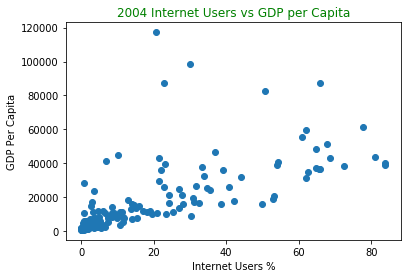

In [36]:
plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita', data = gdp_and_internet_2004)
plt.xlabel('Internet Users %')
plt.ylabel('GDP Per Capita')
plt.title('2004 Internet Users vs GDP per Capita', color = 'green');

### b. 2009 Percent Using the Internet vs GDP Per Capita

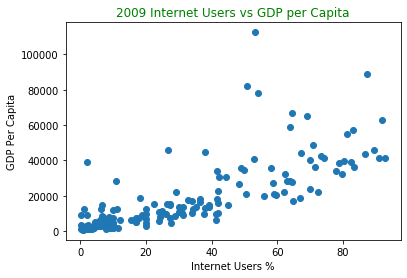

In [37]:
plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita', data = gdp_and_internet_2009)
plt.xlabel('Internet Users %')
plt.ylabel('GDP Per Capita')
plt.title('2009 Internet Users vs GDP per Capita', color = 'green');

### c. 2014 Percent Using the Internet vs GDP Per Capita

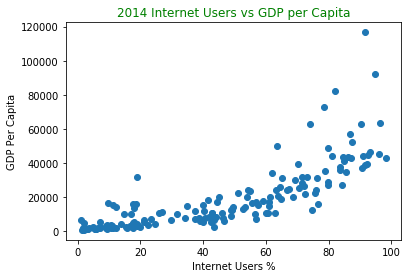

In [38]:
plt.scatter('Internet_Users_Pct', 'GDP_Per_Capita', data = gdp_and_internet_2014)
plt.xlabel('Internet Users %')
plt.ylabel('GDP Per Capita')
plt.title('2014 Internet Users vs GDP per Capita', color = 'green');

### Question 24: Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

### My Observations: Generally, internet users increase with GDP and internet use has become more prevalent over these ten years.

### Question 25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?
### Answer - For the most part, gdp IS unimodal.

In [39]:
## Mahesh Code: 
## plt.hist(gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()]['GDP_Per_Capita'], bins = 100);

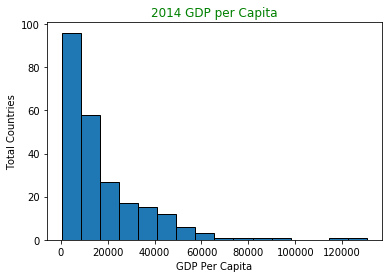

In [40]:
plt.hist('GDP_Per_Capita', edgecolor = 'black', bins = 16, 
         data = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()])
plt.xlabel('GDP Per Capita')
plt.ylabel('Total Countries')
plt.title('2014 GDP per Capita', color = 'green');

### Question 26: Look at the distribution of Internet Use for 2014. Is it unimodal?
### Answer: Internet use IS NOT unimodal.

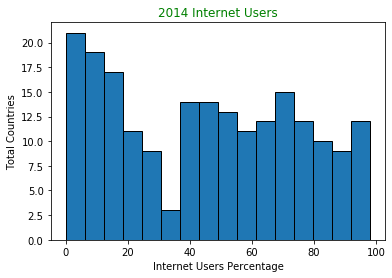

In [41]:
plt.hist('Internet_Users_Pct', bins = 16, edgecolor = 'black', 
         data = gdp_and_internet_2014[gdp_and_internet_2014['Internet_Users_Pct'].notnull()])
plt.xlabel('Internet Users Percentage')
plt.ylabel('Total Countries')
plt.title('2014 Internet Users', color = 'green');

### Question 27: What are the top 5 countries in terms of internet use in 2014?

In [42]:
## Could add to_list() rather than calling new df variable
top_5_2014 = gdp_and_internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)
top_5_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


### Question 28: Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [43]:
temp_top = pd.concat([gdp_and_internet_2004, gdp_and_internet_2009, gdp_and_internet_2014])
country_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet  = temp_top.query("Country in @country_list")
top_5_internet = top_5_internet.sort_values(['Country']).reset_index(drop=True)
top_5_internet.shape

(15, 4)

In [44]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Andorra,2004,NaN,26.837954
1,Andorra,2009,NaN,78.530000
2,Andorra,2014,NaN,95.900000
3,Bermuda,2004,55452.638880,60.990867
4,Bermuda,2009,57151.919132,83.250000
5,Bermuda,2014,NaN,96.800000
6,Denmark,2004,43670.446201,80.930000
7,Denmark,2009,43382.615688,86.840000
8,Denmark,2014,45057.083449,95.990000
9,Iceland,2004,38893.378798,83.880000


### Question 29: Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

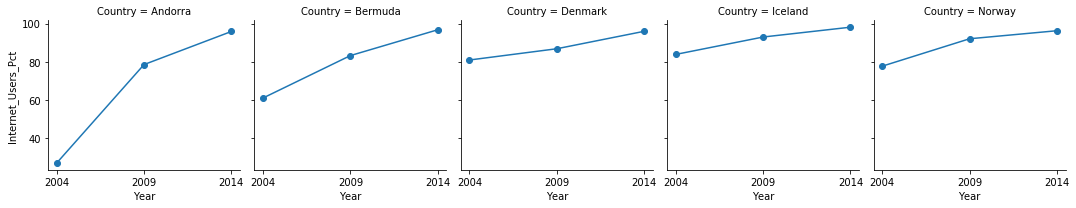

In [45]:
top_5_facets = sns.FacetGrid(top_5_internet, col = 'Country')
top_5_facets = top_5_facets.map(plt.plot, 'Year','Internet_Users_Pct', marker = "o")
top_5_facets.set(xticks = [2004, 2009, 2014])

### Question 30: Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [46]:
temp_bottom = pd.concat([gdp_and_internet_2004, gdp_and_internet_2009, gdp_and_internet_2014])
country_list = ["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
bottom_5_internet = temp_bottom.query("Country in @country_list")
bottom_5_internet = bottom_5_internet.sort_values(['Country']).reset_index(drop=True)
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Burundi,2004,708.833720,0.349060
1,Burundi,2009,721.063140,0.900000
2,Burundi,2014,768.469837,1.380000
3,Dem. People's Rep. of Korea,2004,NaN,0.000000
4,Dem. People's Rep. of Korea,2009,NaN,0.000000
5,Dem. People's Rep. of Korea,2014,NaN,0.000000
6,Eritrea,2004,2317.349879,NaN
7,Eritrea,2009,1950.533339,0.540000
8,Eritrea,2014,NaN,0.990000
9,Somalia,2004,NaN,1.053455


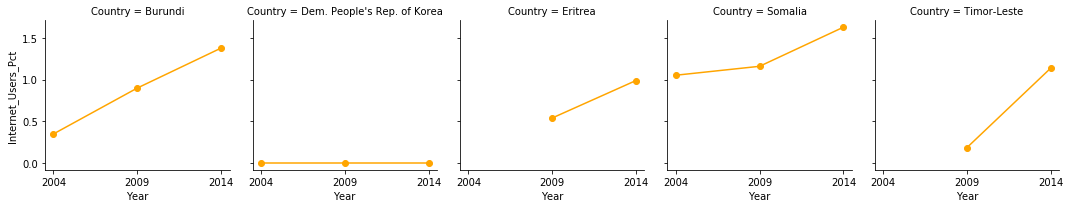

In [47]:
bottom_5_facets = sns.FacetGrid(bottom_5_internet, col = 'Country')
bottom_5_facets = bottom_5_facets.map(plt.plot, 'Year','Internet_Users_Pct', color = 'orange', marker = "o")
bottom_5_facets.set(xticks = [2004, 2009, 2014])

### Question 31: Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

In [48]:
top_5_gdp_2014 = gdp_and_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(5)
top_5_gdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [49]:
temp_gdp_top = pd.concat([gdp_and_internet_2004, gdp_and_internet_2009, gdp_and_internet_2014])
country_list = ["Macao SAR, China", 'Qatar', 'Luxembourg', 'Singapore', 'Brunei']
top_5_gdp = temp_gdp_top.query("Country in @country_list")
top_5_gdp = top_5_gdp.sort_values(['Country']).reset_index(drop=True)
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Brunei,2004,83963.238066,NaN
1,Brunei,2009,79485.001581,NaN
2,Brunei,2014,76448.593329,NaN
3,Luxembourg,2004,87209.819367,65.880000
4,Luxembourg,2009,89098.734264,87.310000
5,Luxembourg,2014,92349.186429,94.670000
6,"Macao SAR, China",2004,60791.976853,NaN
7,"Macao SAR, China",2009,79955.986107,NaN
8,"Macao SAR, China",2014,130439.106674,NaN
9,Qatar,2004,117271.427067,20.701648


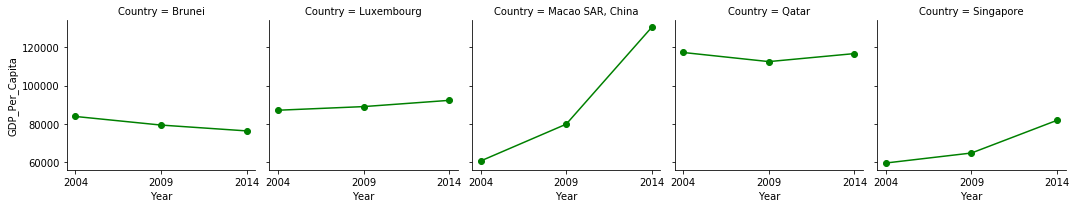

In [50]:
top_5_gdp_facets = sns.FacetGrid(top_5_gdp, col = 'Country')
top_5_gdp_facets = top_5_gdp_facets.map(plt.plot, 'Year','GDP_Per_Capita', color = 'green', marker = "o")
top_5_gdp_facets.set(xticks = [2004, 2009, 2014])

### Question 32: Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [51]:
bottom_5_gdp_2014 = gdp_and_internet_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(5)
bottom_5_gdp_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


In [52]:
temp_gdp_bottom = pd.concat([gdp_and_internet_2004, gdp_and_internet_2009, gdp_and_internet_2014])
country_list = ["Central African Republic", 'Burundi', "Dem. Rep. Congo", 'Niger', 'Malawi']
bottom_5_gdp = temp_gdp_bottom.query("Country in @country_list")
bottom_5_gdp = bottom_5_gdp.sort_values(['Country']).reset_index(drop=True)
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Burundi,2004,708.833720,0.349060
1,Burundi,2009,721.063140,0.900000
2,Burundi,2014,768.469837,1.380000
3,Central African Republic,2004,848.689032,NaN
4,Central African Republic,2009,949.551325,NaN
5,Central African Republic,2014,672.681648,NaN
6,Dem. Rep. Congo,2004,577.483297,NaN
7,Dem. Rep. Congo,2009,636.875743,NaN
8,Dem. Rep. Congo,2014,784.872656,NaN
9,Malawi,2004,862.392437,0.347505


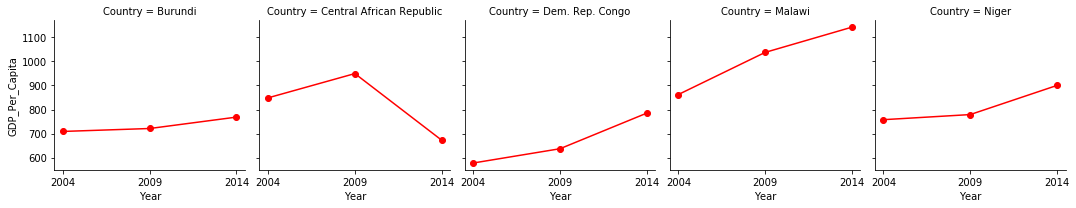

In [53]:
bottom_5_gdp_facets = sns.FacetGrid(bottom_5_gdp, col = 'Country')
bottom_5_gdp_facets = bottom_5_gdp_facets.map(plt.plot, 'Year','GDP_Per_Capita', color = 'red', marker = "o")
bottom_5_gdp_facets.set(xticks = [2004, 2009, 2014])

In [54]:
## Mahesh's approach with ten years of data
"""bottom_5_gdp = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()].sort_values(by = 'GDP_Per_Capita', 
                                                                                        ascending = False).tail()['Country'].tolist()

gdp_and_internet_bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(bottom_5_gdp))&
                                                  (gdp_and_internet_use['Year']>= 2004)&
                                                  (gdp_and_internet_use['Year']<=2014)].sort_values(['Country', 'Year'])

g = sns.FacetGrid(gdp_and_internet_bottom_5_gdp, col = 'Country')
g.map(plt.plot, 'Year', 'GDP_Per_Capita');"""


"bottom_5_gdp = gdp_and_internet_2014[gdp_and_internet_2014['GDP_Per_Capita'].notnull()].sort_values(by = 'GDP_Per_Capita', \n                                                                                        ascending = False).tail()['Country'].tolist()\n\ngdp_and_internet_bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(bottom_5_gdp))&\n                                                  (gdp_and_internet_use['Year']>= 2004)&\n                                                  (gdp_and_internet_use['Year']<=2014)].sort_values(['Country', 'Year'])\n\ng = sns.FacetGrid(gdp_and_internet_bottom_5_gdp, col = 'Country')\ng.map(plt.plot, 'Year', 'GDP_Per_Capita');"

### Question 33: Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

### Internet use has generally increased over time as technology has become more accessible. Andorra grew the fastest and is one of the richest countries in the world.

### GDP in Macau has skyrocketed. Macau's gaming revenue and overall economy thrived as visitors from Mainland China began to surge in 2003 as travel restrictions loosened and Chinese citizens became increasingly wealthy. The city's small population of 650,000 relative to its large economy means its GDP per capita is already one of the world's highest.

### GDP has dropped in South Africa due to civil war & economic downturns. Facing slowing growth and credit downgrades, South Africa’s economy is stuck in the mire, according to CNBC.

## BONUS
### Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.